# Data

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

df_2023=pd.read_csv('df_2023.csv')
# df_2024=pd.read_csv('df_2024_adjusted.csv')
df_22_24=pd.read_csv('df_22_24.csv')

# Create a datetime index for df_2024, starting from January 1st, 2024
date_range_2024 = pd.date_range(start="2024-01-01", periods=len(df_2024), freq="H")
# Assign the datetime index to df_2024
df_2024.index = date_range_2024

# # Create a datetime index for df_2024, starting from January 1st, 2024
# date_range_2023 = pd.date_range(start="2023-01-01", periods=len(df_2023), freq="H")
# # Assign the datetime index to df_2024
# df_2023.index = date_range_2023

date_range_22_24= pd.date_range(start="2022-11-01", periods=len(df_22_24), freq="H")
df_22_24.index=date_range_22_24

In [109]:
df_22_24.tail(10)

,Price_positive_secondary,Price_negative_secondary,Price_positive_tertiary,Price_negative_tertiary,Price_gas,Imbalance netting import,Imbalance netting export,Energy_positive_secondary,Energy_negative_secondary,Energy_positive_tertiary,...,RR n,Total System Imbalance,Exchange_CH_AT,Exchange_AT_CH,Exchange_CH_DE,Exchange_DE_CH,Exchange_CH_FR,Exchange_FR_CH,Exchange_CH_IT,Exchange_IT_CH
2024-07-31 15:00:00,1000.868802,0.000000,44.338524,21.4655,36.0,67.936232,0.000000,29.600,0.000,175.0,...,0.0,-100.227432,42.600,17.196,542.524,9.1,253.081,105.202,754.595,44.340
2024-07-31 16:00:00,455.553107,0.000000,229.030139,0.0000,36.0,57.723266,0.000000,29.681,0.000,175.0,...,0.0,-83.094346,103.645,9.000,763.006,0.0,267.204,110.891,741.614,28.022
2024-07-31 17:00:00,282.602507,1.680442,399.612787,0.0000,36.0,0.000000,-3.177892,8.614,1.086,175.0,...,0.0,38.936086,130.714,9.400,810.908,0.0,355.816,83.038,708.251,31.918
2024-07-31 18:00:00,169.129741,39.110141,463.843083,0.0000,36.0,0.000000,0.000000,3.796,8.133,125.0,...,0.0,269.704223,211.934,9.300,876.258,29.1,253.201,147.789,732.807,35.302
2024-07-31 19:00:00,0.000000,18.993901,245.144596,0.0000,36.0,3.101319,0.000000,0.000,18.173,25.0,...,0.0,8.094697,109.159,9.600,779.416,51.0,253.574,196.062,753.731,39.988
2024-07-31 20:00:00,85.684143,23.041681,0.000000,0.0000,36.0,0.648844,0.000000,1.115,9.917,0.0,...,0.0,37.581846,124.969,9.700,818.699,59.8,290.589,134.537,681.022,45.183
2024-07-31 21:00:00,0.000000,82.826165,0.000000,0.0000,36.0,0.034720,0.000000,0.000,25.449,0.0,...,0.0,58.849304,194.466,8.200,855.934,45.9,278.428,127.463,575.695,51.076
2024-07-31 22:00:00,0.000000,180.359264,0.000000,0.0000,36.0,0.000000,0.000000,0.000,45.685,0.0,...,0.0,79.742886,153.581,8.700,840.947,12.8,273.029,108.680,630.359,44.529
2024-07-31 23:00:00,0.000000,122.837857,0.000000,0.0000,36.0,42.507176,0.000000,0.000,32.965,0.0,...,0.0,-58.480479,175.076,8.000,839.128,3.8,339.630,73.472,677.971,41.931
2024-08-01 00:00:00,0.000000,153.012217,0.000000,0.0000,36.0,87.636538,0.000000,0.000,35.577,0.0,...,0.0,-143.105840,230.462,8.400,860.358,20.7,274.589,121.928,647.676,47.149


# Outliers extraction 2023

### Highest prices

In [110]:
percentile = 0.01

In [111]:
quantile_2023_pos_sec = df_2023['Price_positive_secondary_2023'].quantile(1-percentile)
quantile_2023_neg_sec = df_2023['Price_negative_secondary_2023'].quantile(1-percentile)
quantile_2023_pos_ter = df_2023['Price_positive_tertiary_2023'].quantile(1-percentile)
quantile_2023_neg_ter = df_2023['Price_negative_tertiary_2023'].quantile(1-percentile)

df_2023_pos_sec_h = df_2023[df_2023['Price_positive_secondary_2023'] >= quantile_2023_pos_sec]
df_2023_neg_sec_h = df_2023[df_2023['Price_negative_secondary_2023'] >= quantile_2023_neg_sec]
df_2023_pos_ter_h = df_2023[df_2023['Price_positive_tertiary_2023'] >= quantile_2023_pos_ter]
df_2023_neg_ter_h = df_2023[df_2023['Price_negative_tertiary_2023'] >= quantile_2023_neg_ter]

In [112]:
df_2023_pos_sec_h.shape, df_2023_neg_sec_h.shape, df_2023_pos_ter_h.shape, df_2023_neg_ter_h.shape

((88, 48), (88, 48), (88, 48), (92, 48))

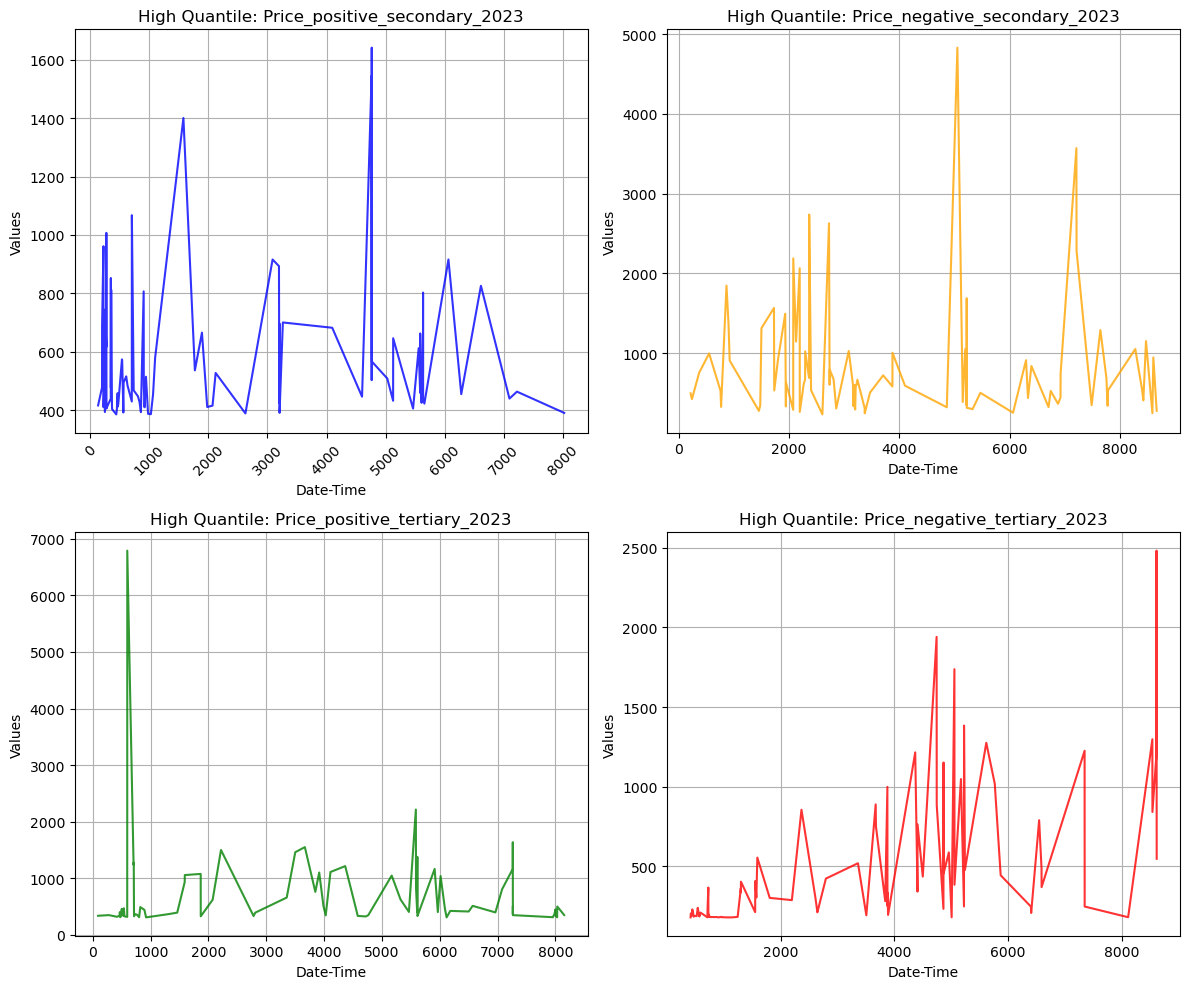

In [113]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

#
# 1) Plot for Price_positive_secondary_2023 (HIGH)
#
axs[0, 0].plot(
    df_2023_pos_sec_h.index, 
    df_2023_pos_sec_h['Price_positive_secondary_2023'], 
    label='Price_positive_secondary_2023 (high quantile)',
    alpha=0.8, color='blue'
)
axs[0, 0].set_title('High Quantile: Price_positive_secondary_2023')
axs[0, 0].set_xlabel('Date-Time')
axs[0, 0].set_ylabel('Values')
axs[0, 0].grid(True)
axs[0, 0].tick_params(axis='x', rotation=45)

#
# 2) Plot for Price_negative_secondary_2023 (HIGH)
#
axs[0, 1].plot(
    df_2023_neg_sec_h.index, 
    df_2023_neg_sec_h['Price_negative_secondary_2023'], 
    label='Price_negative_secondary_2023 (high quantile)',
    alpha=0.8, color='orange'
)
axs[0, 1].set_title('High Quantile: Price_negative_secondary_2023')
axs[0, 1].set_xlabel('Date-Time')
axs[0, 1].set_ylabel('Values')
axs[0, 1].grid(True)

#
# 3) Plot for Price_positive_tertiary_2023 (HIGH)
#
axs[1, 0].plot(
    df_2023_pos_ter_h.index, 
    df_2023_pos_ter_h['Price_positive_tertiary_2023'], 
    label='Price_positive_tertiary_2023 (high quantile)',
    alpha=0.8, color='green'
)
axs[1, 0].set_title('High Quantile: Price_positive_tertiary_2023')
axs[1, 0].set_xlabel('Date-Time')
axs[1, 0].set_ylabel('Values')
axs[1, 0].grid(True)

#
# 4) Plot for Price_negative_tertiary_2023 (HIGH)
#
axs[1, 1].plot(
    df_2023_neg_ter_h.index, 
    df_2023_neg_ter_h['Price_negative_tertiary_2023'], 
    label='Price_negative_tertiary_2023 (high quantile)',
    alpha=0.8, color='red'
)
axs[1, 1].set_title('High Quantile: Price_negative_tertiary_2023')
axs[1, 1].set_xlabel('Date-Time')
axs[1, 1].set_ylabel('Values')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()


### Smallest Prices

In [114]:
quantile_2023_pos_sec = df_2023['Price_positive_secondary_2023'].quantile(percentile)
quantile_2023_neg_sec = df_2023['Price_negative_secondary_2023'].quantile(percentile)
quantile_2023_pos_ter = df_2023['Price_positive_tertiary_2023'].quantile(percentile)
quantile_2023_neg_ter = df_2023['Price_negative_tertiary_2023'].quantile(percentile)

df_2023_pos_sec_l = df_2023[df_2023['Price_positive_secondary_2023'] <= quantile_2023_pos_sec]
df_2023_neg_sec_l = df_2023[df_2023['Price_negative_secondary_2023'] <= quantile_2023_neg_sec]
df_2023_pos_ter_l = df_2023[df_2023['Price_positive_tertiary_2023'] <= quantile_2023_pos_ter]
df_2023_neg_ter_l = df_2023[df_2023['Price_negative_tertiary_2023'] <= quantile_2023_neg_ter]

In [115]:
df_2023_neg_sec_l.head()

,Unnamed: 0,Price_positive_secondary_2023,Price_negative_secondary_2023,Price_positive_tertiary_2023,Price_negative_tertiary_2023,Price_gas_2023,Imbalance netting import_2023,Imbalance netting export_2023,Energy_positive_secondary_2023_24,Energy_negative_secondary_2023_24,...,RR n 2023,Total System Imbalance 2023,Exchange_CH_AT_2023,Exchange_AT_CH_2023,Exchange_CH_DE_2023,Exchange_DE_CH_2023,Exchange_CH_FR_2023,Exchange_FR_CH_2023,Exchange_CH_IT_2023,Exchange_IT_CH_2023
1,1,0.00,0.0,0.0,0.000,67.5,11.708483,0.000000,0.000,0.0,...,0.0,-74.068023,32.200,203.940,13.400,529.105,108.382,169.753,451.595,0.015
16,16,124.10,0.0,0.0,8.212,67.5,0.000000,-24.359726,12.150,0.0,...,0.0,179.486719,103.631,13.587,185.286,131.972,0.000,377.847,296.963,0.000
17,17,245.40,0.0,0.0,7.020,67.5,10.087219,0.000000,33.907,0.0,...,-30.0,102.372566,141.281,9.200,317.490,130.400,0.000,367.135,255.358,0.512
56,56,233.00,0.0,0.0,125.873,62.5,65.797542,0.000000,5.331,0.0,...,-140.0,229.479349,53.700,112.877,166.966,226.660,0.001,303.776,579.971,0.800
78,78,305.45,0.0,0.0,0.000,66.4,0.000000,-31.754151,35.968,0.0,...,0.0,96.933341,55.200,249.948,22.900,716.570,0.000,698.575,901.752,0.193


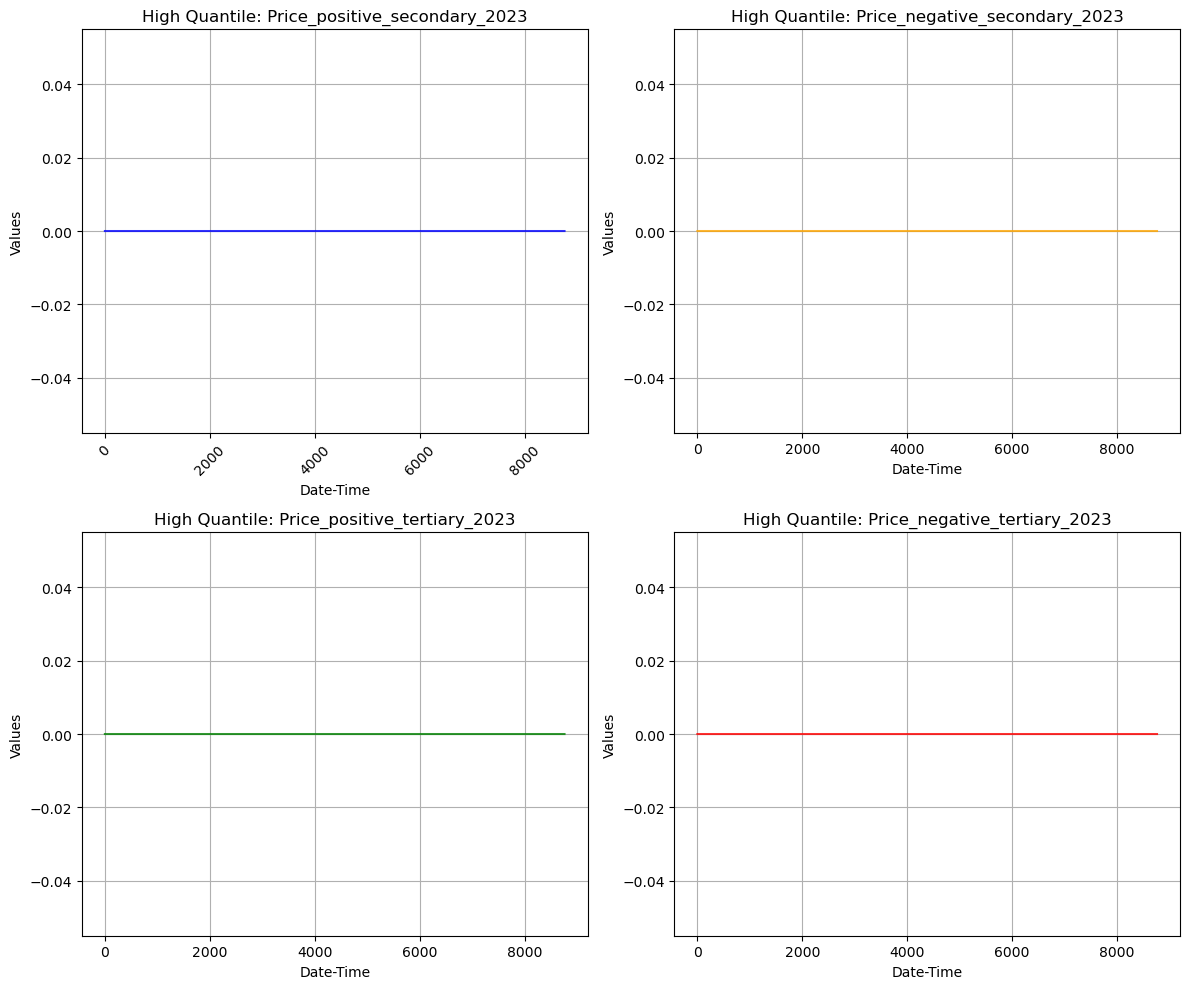

In [116]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

#
# 1) Plot for Price_positive_secondary_2023 (HIGH)
#
axs[0, 0].plot(
    df_2023_pos_sec_l.index, 
    df_2023_pos_sec_l['Price_positive_secondary_2023'], 
    label='Price_positive_secondary_2023 (high quantile)',
    alpha=0.8, color='blue'
)
axs[0, 0].set_title('High Quantile: Price_positive_secondary_2023')
axs[0, 0].set_xlabel('Date-Time')
axs[0, 0].set_ylabel('Values')
axs[0, 0].grid(True)
axs[0, 0].tick_params(axis='x', rotation=45)

#
# 2) Plot for Price_negative_secondary_2023 (HIGH)
#
axs[0, 1].plot(
    df_2023_neg_sec_l.index, 
    df_2023_neg_sec_l['Price_negative_secondary_2023'], 
    label='Price_negative_secondary_2023 (high quantile)',
    alpha=0.8, color='orange'
)
axs[0, 1].set_title('High Quantile: Price_negative_secondary_2023')
axs[0, 1].set_xlabel('Date-Time')
axs[0, 1].set_ylabel('Values')
axs[0, 1].grid(True)

#
# 3) Plot for Price_positive_tertiary_2023 (HIGH)
#
axs[1, 0].plot(
    df_2023_pos_ter_l.index, 
    df_2023_pos_ter_l['Price_positive_tertiary_2023'], 
    label='Price_positive_tertiary_2023 (high quantile)',
    alpha=0.8, color='green'
)
axs[1, 0].set_title('High Quantile: Price_positive_tertiary_2023')
axs[1, 0].set_xlabel('Date-Time')
axs[1, 0].set_ylabel('Values')
axs[1, 0].grid(True)

#
# 4) Plot for Price_negative_tertiary_2023 (HIGH)
#
axs[1, 1].plot(
    df_2023_neg_ter_l.index, 
    df_2023_neg_ter_l['Price_negative_tertiary_2023'], 
    label='Price_negative_tertiary_2023 (high quantile)',
    alpha=0.8, color='red'
)
axs[1, 1].set_title('High Quantile: Price_negative_tertiary_2023')
axs[1, 1].set_xlabel('Date-Time')
axs[1, 1].set_ylabel('Values')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

# Outliers extraction 2023+2 weeks 2024

In [ ]:
# Define the start and end datetime for filtering.
start_date = '2023-01-01 00:00:00'
# For hourly data, the first two weeks of 2024 run from January 1 to January 14 (inclusive).
end_date = '2024-01-14 23:00:00'

# Use .loc to slice the DataFrame based on the datetime index.
df_result = df_22_24.loc[start_date:end_date]

In [120]:
df_result.head(10)

,Price_positive_secondary,Price_negative_secondary,Price_positive_tertiary,Price_negative_tertiary,Price_gas,Imbalance netting import,Imbalance netting export,Energy_positive_secondary,Energy_negative_secondary,Energy_positive_tertiary,...,RR n,Total System Imbalance,Exchange_CH_AT,Exchange_AT_CH,Exchange_CH_DE,Exchange_DE_CH,Exchange_CH_FR,Exchange_FR_CH,Exchange_CH_IT,Exchange_IT_CH
2023-01-01 00:00:00,0.00,61.63,0.0,0.000,67.5,0.000000,-21.093999,0.000,18.685,0.0,...,0.0,26.394371,59.5,162.996,13.7,528.048,0.000,372.085,341.730,4.271
2023-01-01 01:00:00,0.00,0.00,0.0,0.000,67.5,11.708483,0.000000,0.000,0.000,0.0,...,0.0,-74.068023,32.2,203.940,13.4,529.105,108.382,169.753,451.595,0.015
2023-01-01 02:00:00,4.27,9.16,0.0,13.210,67.5,37.025794,0.000000,0.333,0.283,0.0,...,0.0,-101.228598,21.4,238.431,19.0,618.326,164.453,123.904,497.753,0.703
2023-01-01 03:00:00,0.00,27.83,0.0,0.000,67.5,28.247069,0.000000,0.000,14.636,0.0,...,0.0,-26.596472,33.9,220.239,13.1,556.316,144.963,151.833,447.108,1.611
2023-01-01 04:00:00,4.60,37.44,0.0,32.000,67.5,0.000000,-6.911926,0.031,16.491,0.0,...,0.0,4.878460,17.6,244.054,8.1,579.882,52.738,210.655,492.631,9.837
2023-01-01 05:00:00,0.00,31.03,0.0,56.030,67.5,0.000000,-34.984290,0.000,12.931,0.0,...,0.0,93.683178,14.0,268.101,8.6,613.795,36.514,224.947,556.301,4.858
2023-01-01 06:00:00,0.00,31.25,0.0,0.000,67.5,0.000000,-57.593364,0.000,8.646,0.0,...,0.0,132.015993,18.1,258.076,19.4,603.917,84.465,207.080,549.077,0.496
2023-01-01 07:00:00,0.00,41.63,0.0,5.000,67.5,0.000000,-8.803013,0.000,17.534,0.0,...,0.0,194.606180,18.2,287.130,7.6,668.830,112.690,188.687,657.607,0.002
2023-01-01 08:00:00,0.00,45.96,0.0,44.664,67.5,0.000000,-36.554076,0.000,23.350,0.0,...,0.0,254.383490,4.7,298.992,4.5,727.902,81.720,193.029,648.548,0.834
2023-01-01 09:00:00,0.00,87.73,0.0,0.988,67.5,0.000000,-61.193296,0.000,41.391,0.0,...,0.0,266.288801,6.2,296.866,14.8,646.482,79.270,184.121,573.791,0.904
